In [1]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import dmba
from dmba import classificationSummary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Colab environment detected.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/Business Analytics/smt 1/Machine learning/Term Project/walmart.csv'

df = pd.read_csv(path)
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

#Data Preprocessing

Data Cleaning

In [7]:
#check for missing values in the entire DataFrame

missing_values = df.isnull().sum()
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


#EDA

In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean 

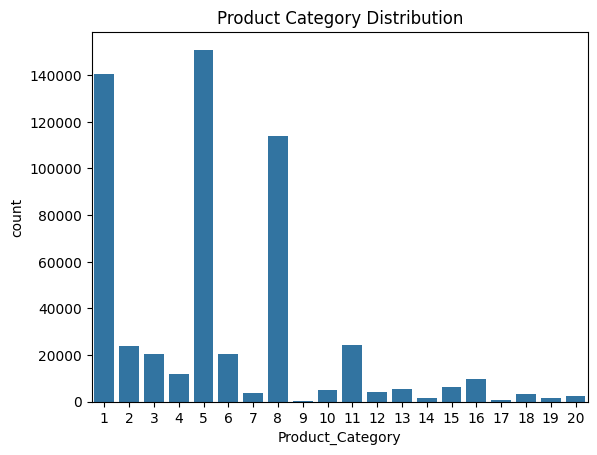

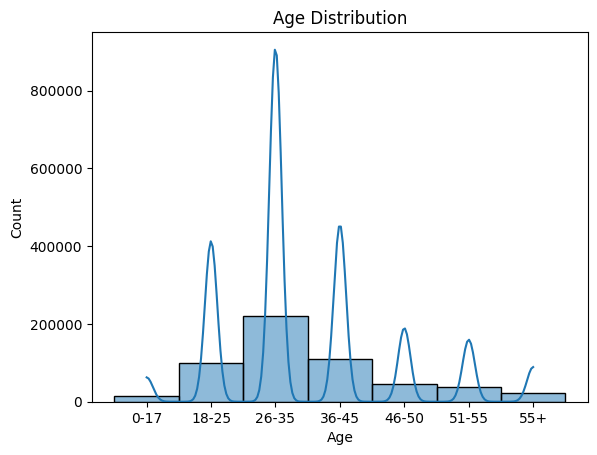

In [11]:
sns.countplot(x='Product_Category', data=df)
plt.title("Product Category Distribution")
plt.show()

df['Age'] = pd.Categorical(df['Age'], categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=True)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

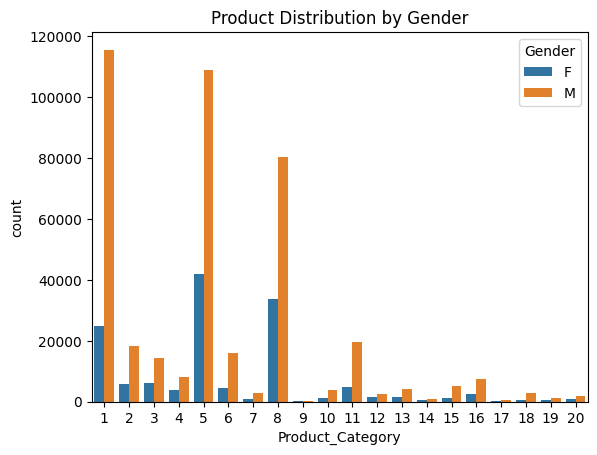

In [ ]:
sns.countplot(x='Product_Category', hue='Gender', data=df)
plt.title("Product Distribution by Gender")
plt.show()


#Split the Data

In [ ]:
# Determine predictor And outcome
predictors = ['Age', 'Occupation',
              'City_Category',
              'Stay_In_Current_City_Years',
              'Gender', 'Marital_Status',
              'Product_Category']
outcome = 'Segment'
# Segmentation based on predetermined expenses

# Adding a target column 'Segment' based on 'Purchase'
df['Segment'] = pd.cut(df['Purchase'],
                       bins=[0, 5000, 15000, 30000],
                       labels=['Low', 'Medium', 'High'])


X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

# Splitting Data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Displays some of the data that has been processed
print(train_X.head())
print(train_y.head())

        Occupation  Marital_Status  Product_Category  Age_18-25  Age_26-35  \
77070            4               0                 1      False       True   
522751           7               1                 1      False       True   
63929            7               0                 1      False      False   
428429           5               0                 8       True      False   
309394           7               0                16      False       True   

        Age_36-45  Age_46-50  Age_51-55  Age_55+  City_Category_B  \
77070       False      False      False    False             True   
522751      False      False      False    False            False   
63929       False      False       True    False            False   
428429      False      False      False    False             True   
309394      False      False      False    False            False   

        City_Category_C  Stay_In_Current_City_Years_1  \
77070             False                          True   
52

#k-NN

In [ ]:
# Standarisasi data training dan validasi
scaler = StandardScaler()

# Melakukan scaling pada data training dan validasi
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)



In [ ]:
# Membuat model k-NN dengan n_neighbors=5 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)




In [ ]:
# Melatih model menggunakan data training yang telah di-scaling
knn.fit(train_X_scaled, train_y)



KNeighborsClassifier()

In [ ]:
# Melakukan prediksi pada data validasi
valid_y_pred = knn.predict(valid_X_scaled)

In [ ]:

# Menghitung akurasi
accuracy = accuracy_score(valid_y, valid_y_pred)
print(f'Akurasi model k-NN: {accuracy * 100:.2f}%')



Akurasi model k-NN: 72.46%


In [ ]:
# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(valid_y, valid_y_pred))
print("\nClassification Report:")
print(classification_report(valid_y, valid_y_pred))

Confusion Matrix:
[[ 30434   1220  12524]
 [  2795  16585  18568]
 [ 18241   7248 112413]]

Classification Report:
              precision    recall  f1-score   support

        High       0.59      0.69      0.64     44178
         Low       0.66      0.44      0.53     37948
      Medium       0.78      0.82      0.80    137902

    accuracy                           0.72    220028
   macro avg       0.68      0.65      0.65    220028
weighted avg       0.72      0.72      0.72    220028



k = 14

In [ ]:
# Loop melalui nilai k yang berbeda dan evaluasi model
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X_scaled, train_y)  # Latih pada data pelatihan yang diskalakan
    accuracy = accuracy_score(valid_y, knn.predict(valid_X_scaled))  # Prediksi pada data validasi yang diskalakan
    print('k:', k, 'accuracy:', accuracy)

k: 1 accuracy: 0.6763366480629738
k: 2 accuracy: 0.6445634192011925
k: 3 accuracy: 0.7158179868016797
k: 4 accuracy: 0.702278800879888
k: 5 accuracy: 0.7245986874397804
k: 6 accuracy: 0.7202265166251568
k: 7 accuracy: 0.7289526787499773
k: 8 accuracy: 0.7265893431745051
k: 9 accuracy: 0.7314569054847565
k: 10 accuracy: 0.7305524751395277
k: 11 accuracy: 0.7291890123075245


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_X_scaled,train_y)
classificationSummary(valid_y, knn.predict(valid_X_scaled))

Confusion Matrix (Accuracy 0.7315)

       Prediction
Actual      0      1      2
     0  30490    912  12776
     1   2875  15384  19689
     2  18105   4730 115067


#Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# split the data into training and validation sets
X_train_nb, X_valid_nb, y_train_nb, y_valid_nb = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
nb=MultinomialNB()
nb.fit(X_train_nb, y_train_nb)
classificationSummary(y_valid_nb, nb.predict(X_valid_nb))

Confusion Matrix (Accuracy 0.6032)

       Prediction
Actual      0      1      2
     0  15050   3461  25667
     1   3423   9022  25503
     2  19102  10159 108641


#Classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from dmba import plotDecisionTree

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
classTree = DecisionTreeClassifier(random_state=1)
classTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0329774 to fit


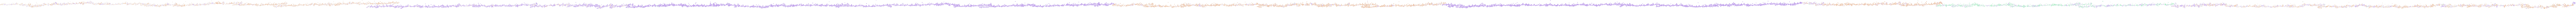

In [ ]:
plotDecisionTree(classTree, feature_names=X_train.columns)

In [ ]:
classificationSummary(y_valid, classTree.predict(X_valid))

Confusion Matrix (Accuracy 0.7578)

       Prediction
Actual      0      1      2
     0  34569    243   9366
     1   2531  16715  18702
     2  19050   3389 115463


In [ ]:
# Create prediction in validation set
y_pred_tree = classTree.predict(X_valid)

In [ ]:
# Model Evaluation
accuracy_tree = accuracy_score(y_valid, y_pred_tree)
print('Accuracy of Classification Tree:', accuracy_tree)

Accuracy of Classification Tree: 0.7578444561601251


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0729512 to fit


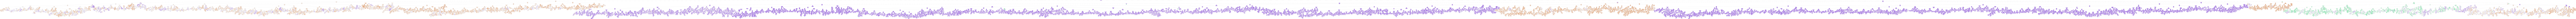

In [ ]:
smallTree=DecisionTreeClassifier(min_samples_split=50)
smallTree.fit(X_train, y_train)
plotDecisionTree(smallTree, feature_names=X_train.columns)

In [ ]:
classificationSummary(y_valid, smallTree.predict(X_valid))

Confusion Matrix (Accuracy 0.7593)

       Prediction
Actual      0      1      2
     0  34858    112   9208
     1   2597  16405  18946
     2  19115   2988 115799


#Multiclass logistic


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
logit = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1)
logit.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=1)

In [ ]:
y_pred_logit = logit.predict(X_valid)

In [ ]:
# Model evaluation
accuracy_logit = accuracy_score(y_valid, y_pred_logit)
print('Accuracy of Multiclass Logistic Regression:', accuracy_logit)

classificationSummary(y_valid, logit.predict(X_valid))

Accuracy of Multiclass Logistic Regression: 0.6352509680586107
Confusion Matrix (Accuracy 0.6353)

       Prediction
Actual      0      1      2
     0      0   1270  42908
     1      0   2974  34974
     2      0   1103 136799


Testing Alternative Solvers

In [ ]:
logit = LogisticRegression(multi_class='multinomial', solver='saga', random_state=1, max_iter = 1000) #to handle convergence issue and max_iter for parameter tunning
logit.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=1,
                   solver='saga')

In [ ]:
y_pred_logit = logit.predict(X_valid)

In [ ]:
# Model evaluation
accuracy_logit = accuracy_score(y_valid, y_pred_logit)
print('Accuracy of Multiclass Logistic Regression:', accuracy_logit)

classificationSummary(y_valid, logit.predict(X_valid))

Accuracy of Multiclass Logistic Regression: 0.6350419037577035
Confusion Matrix (Accuracy 0.6350)

       Prediction
Actual      0      1      2
     0      0   1286  42892
     1      0   2948  35000
     2      0   1123 136779


#Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam',
                    random_state=1)
clf.fit(train_X,train_y)
classificationSummary(valid_y, clf.predict(valid_X))

In [ ]:
# Create prediction in validation set
y_pred_mlp = clf.predict(X_valid)

In [ ]:
# Model evaluation
accuracy_mlp = accuracy_score(y_valid, y_pred_mlp)
print('Accuracy of Neural Networks:', accuracy_mlp)

#Linear Discriminant

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_X,train_y)
classificationSummary(valid_y, lda.predict(valid_X))

#Ensembles

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),
                           n_estimators=100, random_state=1)
boost.fit(train_X,train_y)
classificationSummary(valid_y, boost.predict(valid_X))

In [ ]:
boost = BaggingClassifier(DecisionTreeClassifier(random_state=1),
                          n_estimators=100, random_state=1)
boost.fit(train_X,train_y)
classificationSummary(valid_y, boost.predict(valid_X))

In [ ]:
boost = RandomForestClassifier(n_estimators=100, random_state=1)
boost.fit(train_X,train_y)
classificationSummary(valid_y, boost.predict(valid_X))